In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import sys 
#sys.path.append('../')
from PointGroupPy import vibration_space

# case study, a 2D square molecuar of symmetry C4v 
molecular = {"na":4, 
             "position":np.array([[1,1,0],[-1,1,0],[-1,-1,0],[1,-1,0]]),
             "type": [0,0,0,0]
            }
square = vibration_space(molecular)
from PointGroupPy import MatrixGroup
from PointGroupPy import R_Z 

#build C4v in x,y,z spapce 
Id = np.eye(3)
th = np.pi/2
Rz90 = R_Z(np.pi/2)
sigma_d = np.array([[0,1,0],[1,0,0],[0,0,1]])
C4v = MatrixGroup(generator = [Id,Rz90,sigma_d])
print(f'|C4v| = {C4v.nG}')
if C4v.nG!=8:
   raise ValueError('# of elements in C4v is inconsistent')
C4v.constructMultiplicationTable()
C4v.conjugacy_class()
if C4v.nClass!=5:
   raise ValueError('# of conjugacy classes in C4v is inconsistent')
print('C4v ConjClass = ',C4v.ConjClass)
#
from PointGroupPy import character_solver
ChiSolver = character_solver(C4v.MultilicationTable, C4v.ConjClass)
chi_table = ChiSolver.solve()
print('Character table of C4v = ')
for i in range(C4v.nClass):
   print(" ".join(f"{x:10.2f}" for x in chi_table[:,i]))  # Format numbers to 2 decimal places
C4v.decompose(C4v.G, chi_table)
C4v.build_explicit_IRmatrix(chi_table)

#
square.RepOfGroup(C4v)
Multiplicity = C4v.decompose(square.G, chi_table)
print('Multiplicity = ',Multiplicity)
basis = C4v.basis_function(square.G, chi_table, excluded_space=square.acoustic_translation_mode_2D())
#basis = C4v.basis_function(square.G, chi_table)
dim = 0 
for ir in range(C4v.nClass):
   if len(basis[ir])==0:
      print(f'{ir+1}-IR, chi = {chi_table[:,ir]}, multiplicity = 0, space dim = {0}') 
   else:
      print(f'{ir+1}-IR, chi = {chi_table[:,ir]}, multiplicity = {int(len(basis[ir][0])/int(chi_table[0,ir]+1e-4))}, space dim = {len(basis[ir][0])}') 
   dim = dim + len(basis[ir][0])
print('# of vibration modes = ', dim)


|C4v| = 8
[[0 1 2 3 4 5 6 7]
 [1 3 4 6 7 2 0 5]
 [2 5 0 7 6 1 4 3]
 [3 6 7 0 5 4 1 2]
 [4 2 1 5 0 3 7 6]
 [5 7 6 4 3 0 2 1]
 [6 0 5 1 2 7 3 4]
 [7 4 3 2 1 6 5 0]]
E = 0
C4v ConjClass =  [[0], [1, 6], [2, 7], [3], [4, 5]]
index_Class =  [0 1 2 3 4 4 1 2]
Character table of C4v = 
      1.00       1.00       1.00       1.00       1.00
      1.00       1.00      -1.00       1.00      -1.00
      1.00      -1.00      -1.00       1.00       1.00
      1.00      -1.00       1.00       1.00      -1.00
      2.00       0.00       0.00      -2.00       0.00
This representation is already irreducible!
Decompostion of Cartesian Harmonics in the IRs = 
 l = 0 =  [1. 0. 0. 0. 0.]
 l = 1 =  [1. 0. 0. 0. 1.]
 l = 2 =  [2. 0. 1. 1. 1.]
 l = 3 =  [2. 0. 1. 1. 3.]
 l = 4 =  [4. 1. 2. 2. 3.]
 l = 5 =  [4. 1. 2. 2. 6.]
 l = 6 =  [6. 2. 4. 4. 6.]
 l = 7 =  [ 6.  2.  4.  4. 10.]
 l = 8 =  [ 9.  4.  6.  6. 10.]
 l = 9 =  [ 9.  4.  6.  6. 15.]
5
reps_L =  [0, 4, 2, 2, 1]
----------------------------------
4-t

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


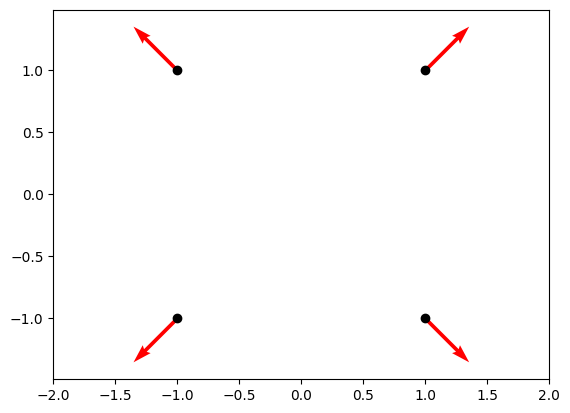

In [2]:
#visualize 2D modes 
square.visualize_mode_2D(basis[0][:,0])

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


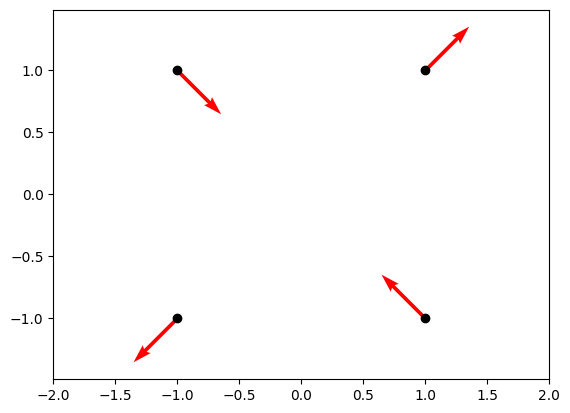

In [3]:
#visualize 2D modes 
square.visualize_mode_2D(basis[1][:,0])

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


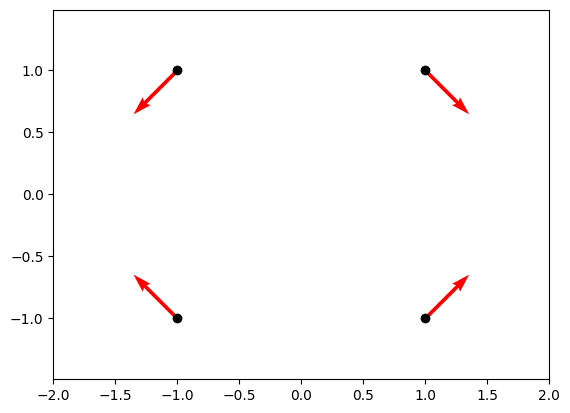

In [6]:
#visualize 2D modes 
square.visualize_mode_2D(basis[2][:,0])

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


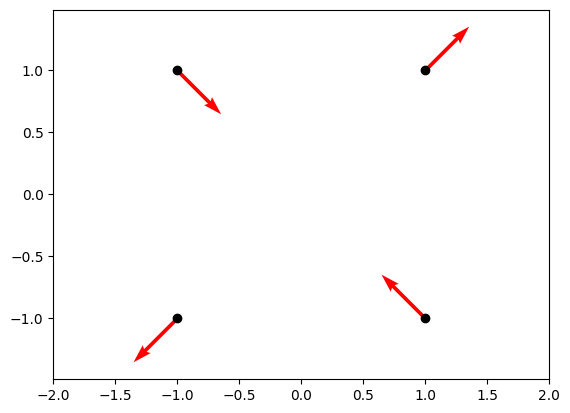

In [7]:
#visualize 2D modes 
square.visualize_mode_2D(basis[3][:,0])

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


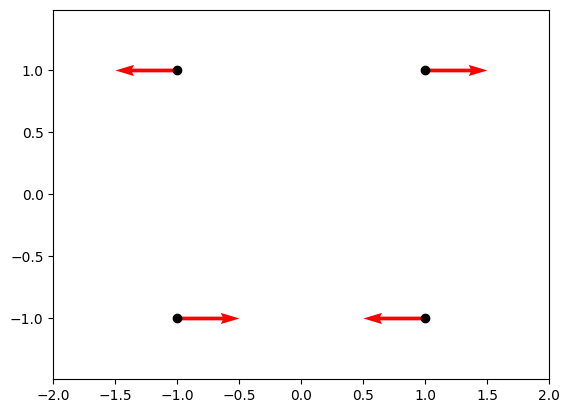

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


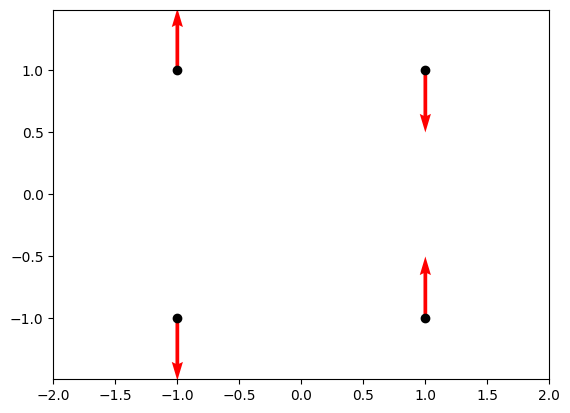

In [8]:
#visualize 2D modes 
square.visualize_mode_2D(basis[4][:,0])
square.visualize_mode_2D(basis[4][:,1])